In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

jiddah sa
hilo us
barentsburg sj
bambous virieux mu
hai phong vn
houma us
qingdao cn
punta arenas cl
bluff nz
hilo us
lisala cd
merritt island us
east london za
ponta do sol cv
chuy uy
qaanaaq gl
nikolskoye ru
coquimbo cl
mar del plata ar
puerto ayora ec
arlit ne
karachi pk
hermanus za
leningradskiy ru
taolanaro mg
hilo us
tyup kg
arlit ne
kodiak us
myitkyina mm
mrirt ma
albany au
moron mn
college us
taolanaro mg
hithadhoo mv
punta arenas cl
mataura pf
dingle ie
ilulissat gl
dolores ar
kapaa us
leningradskiy ru
borama so
cape town za
ust-barguzin ru
mataura pf
trofors no
valenca br
bathsheba bb
berestechko ua
klaksvik fo
rikitea pf
taolanaro mg
tabiauea ki
barentu er
chokurdakh ru
punta arenas cl
hermanus za
victoria sc
barrow us
cape town za
bluff nz
kaitangata nz
safwah sa
ushuaia ar
wuwei cn
bay roberts ca
rikitea pf
punta arenas cl
port alfred za
ponta do sol cv
east london za
port elizabeth za
sorland no
georgetown sh
antibes fr
busselton au
savonlinna fi
upernavik gl
atuona pf
ma

cidreira br
chara ru
bredasdorp za
toulepleu ci
boyolangu id
ushuaia ar
kirra gr
hobart au
lebu cl
castro cl
bluff nz
mar del plata ar
busselton au
omboue ga
suntar ru
taolanaro mg
sosnovo-ozerskoye ru
sur om
busselton au
vaini to
kavaratti in
nikolskoye ru
severo-kurilsk ru
dikson ru
clyde river ca
hilo us
walvis bay na
mbulu tz
cape town za
groningen sr
severo-kurilsk ru
mataura pf
khonuu ru
sawakin sd
severo-yeniseyskiy ru
tigil ru
jamestown sh
kapaa us
ponta do sol cv
cape town za
sangmelima cm
ayan ru
daoukro ci
victoria sc
plouzane fr
new norfolk au
karpuninskiy ru
waingapu id
cape town za
camrose ca
cherskiy ru
taolanaro mg
belushya guba ru
mar del plata ar
vaini to
jamestown sh
ushuaia ar
sao filipe cv
albany au
smithers ca
novonikolayevskaya ru
yellowknife ca
tuatapere nz
nome us
cape town za
hermanus za
nizhneyansk ru
sibolga id
barrow us
filadelfia py
torbay ca
dire ml
severo-kurilsk ru
sentyabrskiy ru
butaritari ki
talnakh ru
port elizabeth za
ushuaia ar
jamestown sh
mataur

svetlaya ru
grand river south east mu
mizdah ly
rikitea pf
atkinson dm
klaksvik fo
bluff nz
central point us
mehamn no
kapaa us
acapulco mx
ilebo cd
saint anthony ca
provideniya ru
solsvik no
saint-philippe re
taolanaro mg
butaritari ki
lompoc us
faya td
rikitea pf
sao filipe cv
katsuura jp


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


610

In [7]:
cities

['jiddah',
 'hilo',
 'barentsburg',
 'bambous virieux',
 'hai phong',
 'houma',
 'qingdao',
 'punta arenas',
 'bluff',
 'lisala',
 'merritt island',
 'east london',
 'ponta do sol',
 'chuy',
 'qaanaaq',
 'nikolskoye',
 'coquimbo',
 'mar del plata',
 'puerto ayora',
 'arlit',
 'karachi',
 'hermanus',
 'leningradskiy',
 'taolanaro',
 'tyup',
 'kodiak',
 'myitkyina',
 'mrirt',
 'albany',
 'moron',
 'college',
 'hithadhoo',
 'mataura',
 'dingle',
 'ilulissat',
 'dolores',
 'kapaa',
 'borama',
 'cape town',
 'ust-barguzin',
 'trofors',
 'valenca',
 'bathsheba',
 'berestechko',
 'klaksvik',
 'rikitea',
 'tabiauea',
 'barentu',
 'chokurdakh',
 'victoria',
 'barrow',
 'kaitangata',
 'safwah',
 'ushuaia',
 'wuwei',
 'bay roberts',
 'port alfred',
 'port elizabeth',
 'sorland',
 'georgetown',
 'antibes',
 'busselton',
 'savonlinna',
 'upernavik',
 'atuona',
 'okhotsk',
 'attawapiskat',
 'kiunga',
 'bredasdorp',
 'ust-tsilma',
 'pisco',
 'jamestown',
 'naze',
 'arraial do cabo',
 'norman wells',


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [20]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 11 of Set 13 | jiddah
City not found. Skipping...
Processing Record 12 of Set 13 | hilo
Processing Record 13 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 13 | bambous virieux
Processing Record 15 of Set 13 | hai phong
City not found. Skipping...
Processing Record 16 of Set 13 | houma
Processing Record 17 of Set 13 | qingdao
Processing Record 18 of Set 13 | punta arenas
Processing Record 19 of Set 13 | bluff
Processing Record 20 of Set 13 | lisala
Processing Record 21 of Set 13 | merritt island
Processing Record 22 of Set 13 | east london
Processing Record 23 of Set 13 | ponta do sol
Processing Record 24 of Set 13 | chuy
Processing Record 25 of Set 13 | qaanaaq
Processing Record 26 of Set 13 | nikolskoye
Processing Record 27 of Set 13 | coquimbo
Processing Record 28 of Set 13 | mar del plata
Processing Record 29 of Set 13 | puerto ayora
Processing Record 30 of Set 13 | arlit
Processing Record 31 of Set 13 | karachi
Processing Record 3

Processing Record 32 of Set 16 | dikson
Processing Record 33 of Set 16 | valdivia
Processing Record 34 of Set 16 | butaritari
Processing Record 35 of Set 16 | tabas
Processing Record 36 of Set 16 | furth im wald
Processing Record 37 of Set 16 | jaru
Processing Record 38 of Set 16 | bethel
Processing Record 39 of Set 16 | muros
Processing Record 40 of Set 16 | manaquiri
Processing Record 41 of Set 16 | hambantota
Processing Record 42 of Set 16 | iqaluit
Processing Record 43 of Set 16 | margate
Processing Record 44 of Set 16 | kawana waters
City not found. Skipping...
Processing Record 45 of Set 16 | hami
Processing Record 46 of Set 16 | kavieng
Processing Record 47 of Set 16 | najran
Processing Record 48 of Set 16 | hofn
Processing Record 49 of Set 16 | lucapa
Processing Record 50 of Set 16 | aketi
Processing Record 1 of Set 17 | kindu
Processing Record 2 of Set 17 | morro bay
Processing Record 3 of Set 17 | boralday
Processing Record 4 of Set 17 | thompson
Processing Record 5 of Set 17

Processing Record 19 of Set 20 | jadu
Processing Record 20 of Set 20 | fort-shevchenko
Processing Record 21 of Set 20 | geraldton
Processing Record 22 of Set 20 | port blair
Processing Record 23 of Set 20 | west bay
Processing Record 24 of Set 20 | kjollefjord
Processing Record 25 of Set 20 | bur gabo
City not found. Skipping...
Processing Record 26 of Set 20 | maarianhamina
Processing Record 27 of Set 20 | paredon
Processing Record 28 of Set 20 | itaituba
Processing Record 29 of Set 20 | sao miguel do araguaia
Processing Record 30 of Set 20 | ryotsu
Processing Record 31 of Set 20 | christchurch
Processing Record 32 of Set 20 | portland
Processing Record 33 of Set 20 | paamiut
Processing Record 34 of Set 20 | codrington
Processing Record 35 of Set 20 | abreus
Processing Record 36 of Set 20 | san joaquin
Processing Record 37 of Set 20 | san cristobal
Processing Record 38 of Set 20 | sabha
Processing Record 39 of Set 20 | port augusta
Processing Record 40 of Set 20 | bintulu
Processing R

Processing Record 4 of Set 24 | olafsvik
Processing Record 5 of Set 24 | cerritos
Processing Record 6 of Set 24 | kamaishi
Processing Record 7 of Set 24 | saint-georges
Processing Record 8 of Set 24 | freetown
Processing Record 9 of Set 24 | pahrump
Processing Record 10 of Set 24 | shimoda
Processing Record 11 of Set 24 | wanaka
Processing Record 12 of Set 24 | mbala
Processing Record 13 of Set 24 | aripuana
Processing Record 14 of Set 24 | seoul
Processing Record 15 of Set 24 | sisimiut
Processing Record 16 of Set 24 | yendi
Processing Record 17 of Set 24 | san vicente
Processing Record 18 of Set 24 | wewak
Processing Record 19 of Set 24 | mount holly
Processing Record 20 of Set 24 | beira
Processing Record 21 of Set 24 | wanning
Processing Record 22 of Set 24 | dibaya
City not found. Skipping...
Processing Record 23 of Set 24 | saint-pierre
Processing Record 24 of Set 24 | eyl
Processing Record 25 of Set 24 | linchuan
City not found. Skipping...
Processing Record 26 of Set 24 | garou

In [21]:
city_data

[{'City': 'Hilo',
  'Lat': 19.7297,
  'Lng': -155.09,
  'Max Temp': 78.53,
  'Humidity': 73,
  'Cloudiness': 90,
  'Wind Speed': 0,
  'Country': 'US',
  'Date': '2021-07-31 02:13:10'},
 {'City': 'Bambous Virieux',
  'Lat': -20.3428,
  'Lng': 57.7575,
  'Max Temp': 70.05,
  'Humidity': 68,
  'Cloudiness': 75,
  'Wind Speed': 11.5,
  'Country': 'MU',
  'Date': '2021-07-31 02:15:31'},
 {'City': 'Houma',
  'Lat': 29.5958,
  'Lng': -90.7195,
  'Max Temp': 87.8,
  'Humidity': 86,
  'Cloudiness': 85,
  'Wind Speed': 1.01,
  'Country': 'US',
  'Date': '2021-07-31 02:15:32'},
 {'City': 'Qingdao',
  'Lat': 36.0986,
  'Lng': 120.3719,
  'Max Temp': 82.17,
  'Humidity': 69,
  'Cloudiness': 0,
  'Wind Speed': 3.87,
  'Country': 'CN',
  'Date': '2021-07-31 02:12:45'},
 {'City': 'Punta Arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 37.51,
  'Humidity': 75,
  'Cloudiness': 0,
  'Wind Speed': 21.85,
  'Country': 'CL',
  'Date': '2021-07-31 02:12:05'},
 {'City': 'Bluff',
  'Lat': -46.6,
  'L

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,78.53,73,90,0.00,US,2021-07-31 02:13:10
1,Bambous Virieux,-20.3428,57.7575,70.05,68,75,11.50,MU,2021-07-31 02:15:31
2,Houma,29.5958,-90.7195,87.80,86,85,1.01,US,2021-07-31 02:15:32
3,Qingdao,36.0986,120.3719,82.17,69,0,3.87,CN,2021-07-31 02:12:45
4,Punta Arenas,-53.1500,-70.9167,37.51,75,0,21.85,CL,2021-07-31 02:12:05
5,Bluff,-46.6000,168.3333,49.80,92,100,4.59,NZ,2021-07-31 02:15:32
6,Lisala,2.1500,21.5167,68.18,91,100,2.37,CD,2021-07-31 02:15:33
7,Merritt Island,28.5392,-80.6720,86.36,86,75,1.99,US,2021-07-31 02:15:33
8,East London,-33.0153,27.9116,58.37,55,1,6.89,ZA,2021-07-31 02:15:33
9,Ponta Do Sol,32.6667,-17.1000,73.00,81,0,5.46,PT,2021-07-31 02:15:33


In [24]:
#Reordering columns
new_Column_order = [ "City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_Column_order]


In [25]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-07-31 02:13:10,19.7297,-155.0900,78.53,73,90,0.00
1,Bambous Virieux,MU,2021-07-31 02:15:31,-20.3428,57.7575,70.05,68,75,11.50
2,Houma,US,2021-07-31 02:15:32,29.5958,-90.7195,87.80,86,85,1.01
3,Qingdao,CN,2021-07-31 02:12:45,36.0986,120.3719,82.17,69,0,3.87
4,Punta Arenas,CL,2021-07-31 02:12:05,-53.1500,-70.9167,37.51,75,0,21.85
...,...,...,...,...,...,...,...,...,...
555,Mizdah,LY,2021-07-31 02:16:00,31.4451,12.9801,74.98,36,0,1.97
556,Atkinson,US,2021-07-31 02:15:00,42.8384,-71.1470,67.24,60,1,1.01
557,Central Point,US,2021-07-31 02:18:14,42.3760,-122.9164,83.64,46,75,5.01
558,Ilebo,CD,2021-07-31 02:18:15,-4.3167,20.5833,77.16,37,83,1.86


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## Plot Latitude vs. Humidity

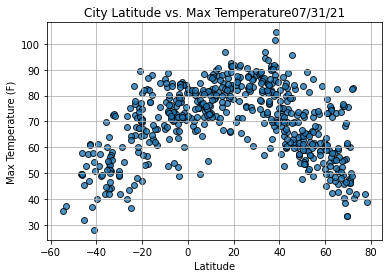

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1, marker = "o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

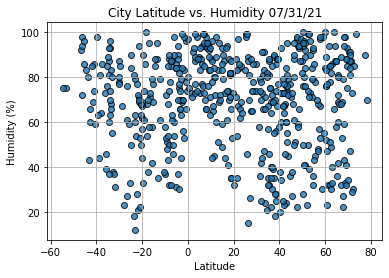

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths = 1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

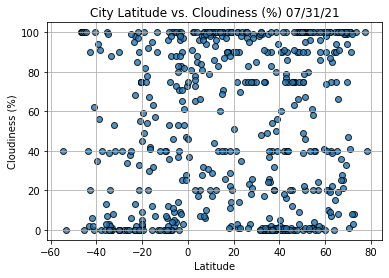

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths = 1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed


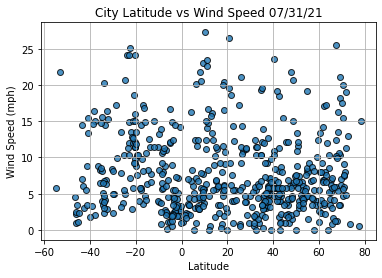

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()


## Find the Correlation Between Latitude and Maximum Temperature


In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Create the Hemisphere DataFrames


In [47]:
index13 = city_data_df.loc[13]

In [48]:
index13

City                     Coquimbo
Country                        CL
Date          2021-07-31 02:15:35
Lat                      -29.9533
Lng                      -71.3436
Max Temp                    49.73
Humidity                       87
Cloudiness                     90
Wind Speed                    2.3
Name: 13, dtype: object

In [50]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-07-31 02:13:10,19.7297,-155.0900,78.53,73,90,0.00
2,Houma,US,2021-07-31 02:15:32,29.5958,-90.7195,87.80,86,85,1.01
3,Qingdao,CN,2021-07-31 02:12:45,36.0986,120.3719,82.17,69,0,3.87
6,Lisala,CD,2021-07-31 02:15:33,2.1500,21.5167,68.18,91,100,2.37
7,Merritt Island,US,2021-07-31 02:15:33,28.5392,-80.6720,86.36,86,75,1.99


In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

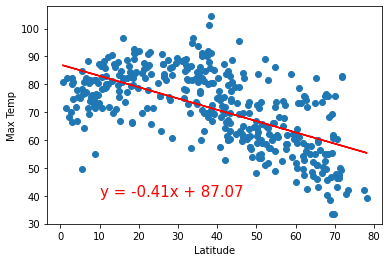

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear regression on the Northern Hemisphere \ for Maximum Temperature",
                       "Max Temp",(10,40))


## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

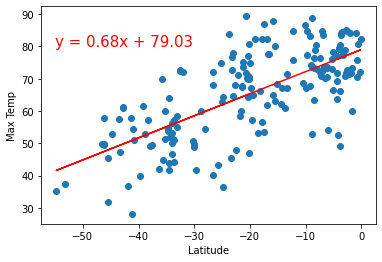

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,80))

### FINDING
The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

## Find the Correlation Between Latitude and Percent Humidity

<hr>

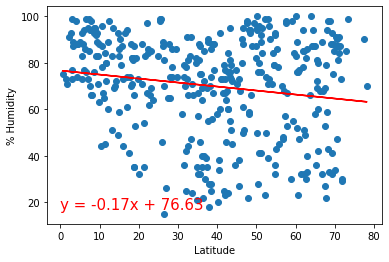

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(0,17))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

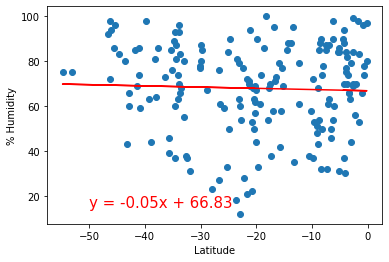

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-50,15))

## Find the Correlation Between Latitude and Percent Cloudiness
<hr>

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

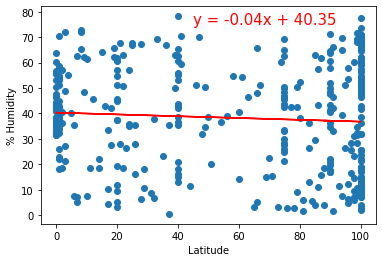

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Cloudiness"]
y_values = northern_hemi_df["Lat"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Humidity',(45,75)) 

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-50,60))

## Find the Correlation Between Latitude and Wind Speed
<hr>

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

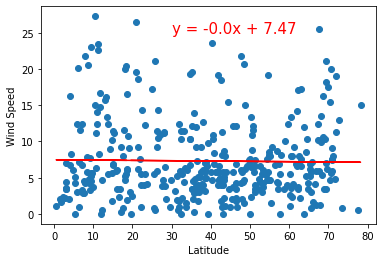

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',(30,25))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

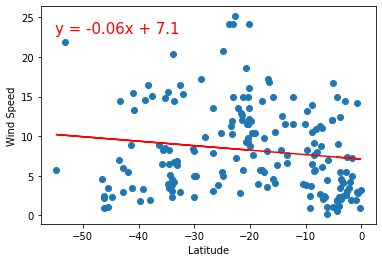

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',(-55,23))